In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import SimpleRNN, Flatten, TimeDistributed, LSTM, Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Conv2D, MaxPooling2D

%matplotlib inline

In [2]:
dataset_train = pd.read_csv('../Sign-Language-to-Text-Conversion/Dataset/sign_mnist_train.csv')
dataset_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
dataset_test = pd.read_csv('../Sign-Language-to-Text-Conversion/Dataset/sign_mnist_test.csv', low_memory=False)
dataset_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
print('Number of images in the training set: {}'.format(dataset_train.shape[0]))
print('Number of images in the test set: {}'.format(dataset_test.shape[0]))

d = int((dataset_train.shape[1] - 1)**0.5)
print('Shape of the images: {} x {}'.format(d,d))

Number of images in the training set: 27455
Number of images in the test set: 14347
Shape of the images: 28 x 28


In [5]:
labels = dataset_train['label']

In [6]:
dataset_train.drop('label', axis = 1, inplace = True)
print(dataset_train.shape)

(27455, 784)


In [7]:
x_train = dataset_train.values.reshape(dataset_train.shape[0],28,28,1)

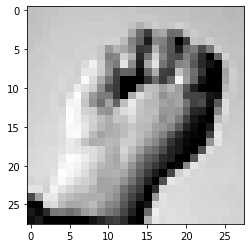

In [8]:
plt.imshow(x_train[100].reshape(28,28), cmap='gray')

In [9]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels)
print(labels.shape)

(27455, 25)


In [10]:
# Normalize Dataset
x_train = x_train / 255.0
print(x_train.shape)

(27455, 28, 28, 1)


In [11]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels)
print(labels.shape)
y_train=labels

(27455, 25, 2)


In [12]:
labels_test = dataset_test['label']
dataset_test.drop('label', axis = 1, inplace = True)
print(dataset_test.shape)
x_test = dataset_test.values.reshape(dataset_test.shape[0],28,28,1)
labels_test = to_categorical(labels_test)
y_test=labels_test
x_test = x_test / 255.0

(14347, 784)


ValueError: invalid literal for int() with base 10: '======='

In [15]:
batch_size = 128
num_classes = 10
epochs = 12

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'y_test' is not defined